# `Yahoo Finance Web Scraping`


In [1]:
# Importing necessary libraries# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
def get_stock_price(company):
    try:
        # Define the user-agent header to mimic a web browser
        header = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
        }

        # Construct the URL to fetch data from Yahoo Finance for the specified company
        url = f'https://finance.yahoo.com/quote/{company}/'

        # Send an HTTP GET request to the URL with the defined headers
        r = requests.get(url, headers=header)
        r.raise_for_status()  # Raise an exception for HTTP errors

        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(r.text, 'html.parser')

        # Extract relevant stock price information and store it in a dictionary
        prices = {
            'Company_name': soup.find('h1', {'class': 'D(ib) Fz(18px)'}).text,
            'price': soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('fin-streamer')[0].text,
            'previous_close': soup.find('table', {'class': 'W(100%)'}).find_all('td')[1].text,
            'open': soup.find('table', {'class': 'W(100%)'}).find_all('td')[3].text,
            'change': soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('fin-streamer')[1].text,
            'change_percent': soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('fin-streamer')[2].text,
            'date': datetime.now().strftime("%Y-%m-%d_%H-%M")
        }

        return prices
    except requests.exceptions.RequestException as e:
        print(f"Error while fetching data for {company}: {e}")
        return None
    except Exception as e:
        print(f"Error for {company}: {e}")
        return None

In [ ]:
# Send an HTTP GET request to the page
url = 'https://finance.yahoo.com/trending-tickers'
try:
    response = requests.get(url)
    response.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"Error while fetching the trending tickers page: {e}")
    response = None

if response:
    # Initialize an empty list to store the extracted text
    quote_links_list = []

    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all anchor elements with 'data-test' attribute set to 'quoteLink'
    quote_links = soup.find_all('a', {'data-test': 'quoteLink'})

    # Extract the text content from all quoteLink anchors and add to the list
    for link in quote_links:
        quote_links_list.append(link.text)

    # Print the list
    print(quote_links_list)
else:
    print("Failed to retrieve the page.")

data = []

for item in quote_links_list:
    stock_data = get_stock_price(item)
    if stock_data:
        data.append({'name': item, **stock_data})

if data:
    csv_file = f'{datetime.now().strftime("%Y-%m-%d_%H-%M")} Stock_data.csv'
    df = pd.DataFrame(data)
    df.to_csv(csv_file, index=False)
else:
    print("No data to save to CSV.")

In [176]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)


df.head()

,name,Company_name,price,previous_close,open,change,change_percent,date
0,AAPL,Apple Inc. (AAPL),175.51,177.57,174.24,-2.06,(-1.16%),2023-11-03
1,FTNT,"Fortinet, Inc. (FTNT)",48.07,57.59,44.50,-9.52,(-16.53%),2023-11-03
2,SQ,"Block, Inc. (SQ)",49.74,43.98,50.80,+5.76,(+13.10%),2023-11-03
3,DKNG,DraftKings Inc. (DKNG),31.33,28.98,30.32,+2.35,(+8.11%),2023-11-03
4,BILL,"BILL Holdings, Inc. (BILL)",62.18,89.47,64.05,-27.29,(-30.50%),2023-11-03


# `Data Cleaning`

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            30 non-null     object
 1   Company_name    30 non-null     object
 2   price           30 non-null     object
 3   previous_close  30 non-null     object
 4   open            30 non-null     object
 5   change          30 non-null     object
 6   change_percent  30 non-null     object
 7   date            30 non-null     object
dtypes: object(8)
memory usage: 2.0+ KB


In [178]:
df.tail(10)

,name,Company_name,price,previous_close,open,change,change_percent,date
20,MGA,Magna International Inc. (MGA),56.09,49.04,53.77,+7.05,(+14.38%),2023-11-03
21,CHD,"Church & Dwight Co., Inc. (CHD)",86.24,91.96,85.30,-5.72,(-6.22%),2023-11-03
22,NQ=F,Nasdaq 100 Dec 23 (NQ=F),"15,099.75",N/A,2023-12-15,+101.75,(+0.68%),2023-11-03
23,GC=F,Gold Dec 23 (GC=F),"2,002.20",N/A,2023-12-27,+8.70,(+0.44%),2023-11-03
24,ES=F,E-Mini S&P 500 Dec 23 (ES=F),"4,367.00",N/A,2023-12-15,+31.25,(+0.72%),2023-11-03
25,NVOS,"Novo Integrated Sciences, Inc. (NVOS)",0.3061,0.2585,0.3000,+0.0476,(+18.41%),2023-11-03
26,YM=F,Mini Dow Jones Indus.-$5 Dec 23 (YM=F),"34,048.00",N/A,2023-12-15,+134.00,(+0.40%),2023-11-03
27,CAH,"Cardinal Health, Inc. (CAH)",102.14,93.78,96.27,+8.36,(+8.91%),2023-11-03
28,VRTX,Vertex Pharmaceuticals Incorporated (VRTX),379.45,376.55,379.64,+2.90,(+0.77%),2023-11-03
29,QSR.TO,Restaurant Brands International Inc. (QSR.TO),91.43,94.98,90.70,-3.55,(-3.74%),2023-11-03


In [179]:
# dropping some rows that are currencies and not companies

df = df[df['previous_close'] != 'N/A']


- Price, change, change_percent need to be changed to floats

In [180]:
the_list  = ['price', 'change','previous_close','open', 'change_percent']
for x in the_list:
    df[x] = df[x].apply(lambda y: float(y.replace('+', '').replace(',', '').replace('(', '').replace(')', '').replace('%', '')))
    

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            26 non-null     object 
 1   Company_name    26 non-null     object 
 2   price           26 non-null     float64
 3   previous_close  26 non-null     float64
 4   open            26 non-null     float64
 5   change          26 non-null     float64
 6   change_percent  26 non-null     float64
 7   date            26 non-null     object 
dtypes: float64(5), object(3)
memory usage: 1.8+ KB


In [204]:
df.head()

,name,Company_name,price,previous_close,open,change,change_percent,date
0,AAPL,Apple Inc. (AAPL),175.51,177.57,174.24,-2.06,-1.16,2023-11-03
1,FTNT,"Fortinet, Inc. (FTNT)",48.07,57.59,44.50,-9.52,-16.53,2023-11-03
2,SQ,"Block, Inc. (SQ)",49.74,43.98,50.80,5.76,13.10,2023-11-03
3,DKNG,DraftKings Inc. (DKNG),31.33,28.98,30.32,2.35,8.11,2023-11-03
4,BILL,"BILL Holdings, Inc. (BILL)",62.18,89.47,64.05,-27.29,-30.50,2023-11-03


`Save data into csv`

In [ ]:
csv_file = f'{datetime.now().strftime("%Y-%m-%d_%H-%M")} Stock_data.csv'


df.to_csv(csv_file, index=False)  # Set index=False to exclude the index column

# `Exploratory Data Analysis`

`Price Distribution`

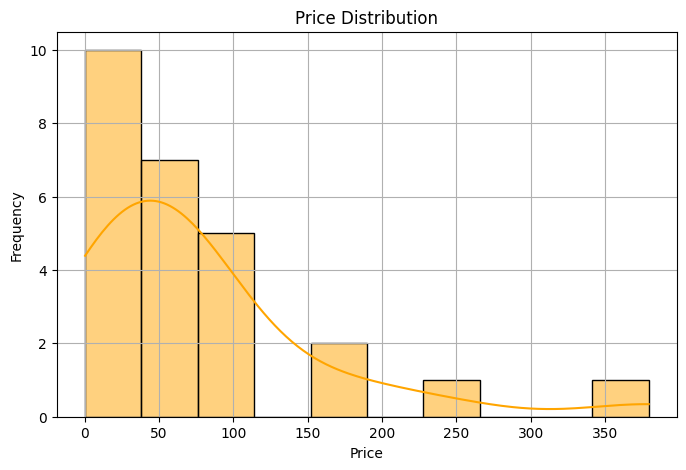

In [201]:

# Plot the 'price' distribution using Seaborn with a custom palette
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=10, kde=True, color="orange")
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


`observation`

1. The prices vary widely, ranging from as low as almost 0 to as high as 380.

2. Most of the prices are within a moderate range, with some outliers at both the low and high ends.

3. There is a significant difference in price between the highest-priced stock (379.45) and the lowest-priced stock (0.3061).

4. It appears that some stocks have very low prices, which could indicate either penny stocks or stocks with a very low market value.

5. A majority of the stocks have prices in the double digits or low triple digits, suggesting they may be from companies with moderate to large market capitalization.


`Price Distribution (Boxplot`

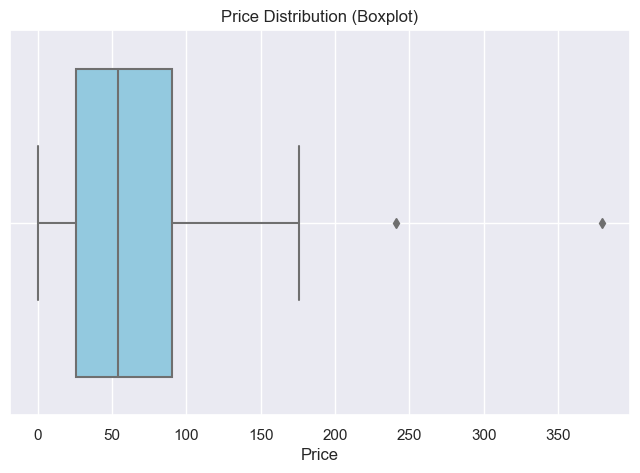

In [211]:
sns.set_style("dark")
plt.figure(figsize=(8, 5))

sns.boxplot(x=df['price'], color='skyblue')
plt.title('Price Distribution (Boxplot)')
plt.xlabel('Price')
plt.grid(True)
plt.show()


`Observation`

- The presence of outliers highlights the existence of stocks with extreme price values, which could be of interest for further analysis.
- The majority of the stock prices are concentrated in the lower to middle price range, with a few stocks having much higher prices
- The median (middle line inside the box) is around 50, indicating that approximately half of the stock prices are below this value.

`Company stock price value`

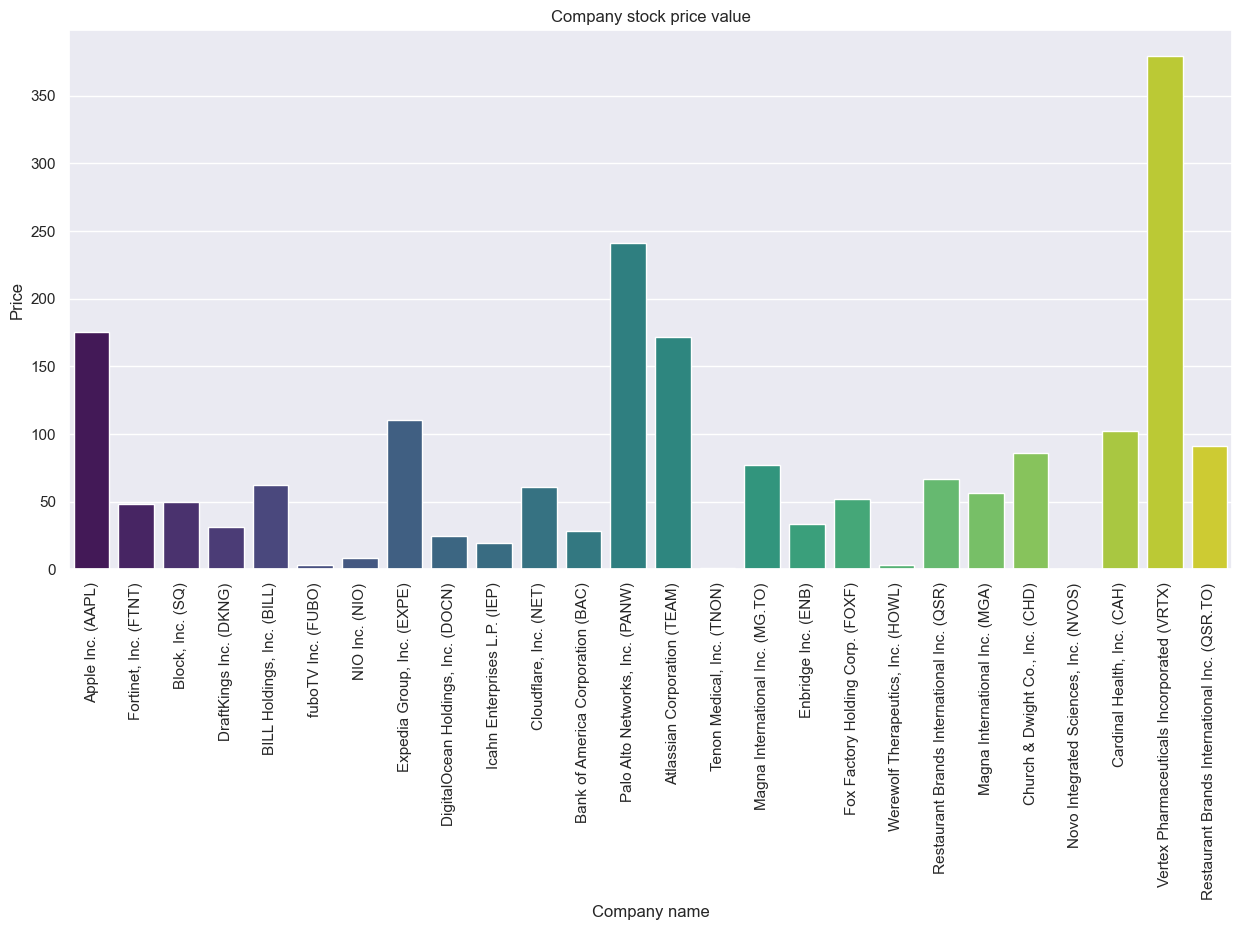

In [222]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Company_name', y='price', data=df, palette='viridis')
plt.title('Company stock price value')
plt.xlabel('Company name')
plt.ylabel('Price')
plt.grid(axis='y')
plt.xticks(rotation=90) 
plt.show()


`Observation`

- There are well-established and recognizable companies, such as Apple Inc. (AAPL) and Vertex Pharmaceuticals Incorporated (VRTX), with relatively higher stock prices.

- There are companies with much lower stock prices, including fuboTV Inc. (FUBO) and Tenon Medical, Inc. (TNON), which could be considered lower-priced or penny stocks.

- The dataset also includes companies from different countries, as indicated by stock symbols such as "MG.TO" (Magna International Inc. on the Toronto Stock Exchange), "MGA" (Magna International Inc.), and "QSR.TO" (Restaurant Brands International Inc. on the Toronto Stock Exchange).

- The presence of international companies suggests a global perspective in the dataset, with companies listed on various stock exchanges.

`Stock Price Changes`

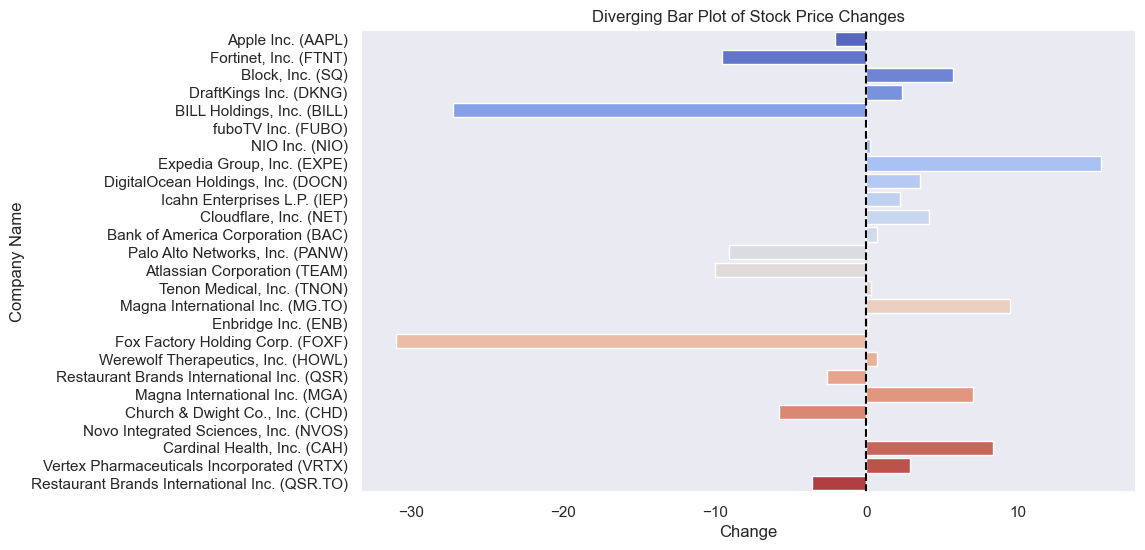

In [229]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a diverging bar plot
sns.barplot(x='change', y='Company_name', data=df, palette='coolwarm', orient='h')

# Add a vertical line at the reference point (e.g., zero)
plt.axvline(x=0, color='black', linestyle='--')

# Set plot labels and title
plt.xlabel('Change')
plt.ylabel('Company Name')
plt.title('Bar Plot of Stock Price Changes')

# Display the plot
plt.show()

`Observation`


* The changes in stock prices vary widely, with some companies experiencing significant increases and others facing decreases in their stock values.

* Apple Inc. (AAPL) and Fortinet, Inc. (FTNT) both had negative changes, indicating a decrease in their stock prices.

* Block, Inc. (SQ) and DraftKings Inc. (DKNG) saw positive changes, suggesting an increase in their stock prices.

* BILL Holdings, Inc. (BILL) experienced a substantial decrease in stock price, with a change of -27.29.

* Expedia Group, Inc. (EXPE) had a significant positive, indicating a substantial increase in its stock value.

* There are some instances of minor changes, both positive and negative, for various companies, such as fuboTV Inc. (FUBO), NIO Inc. (NIO), and others.

* The changes in stock prices may reflect various factors, such as market trends, company performance, economic conditions, and investor sentiment.



`Open and Close Prices Over Time`

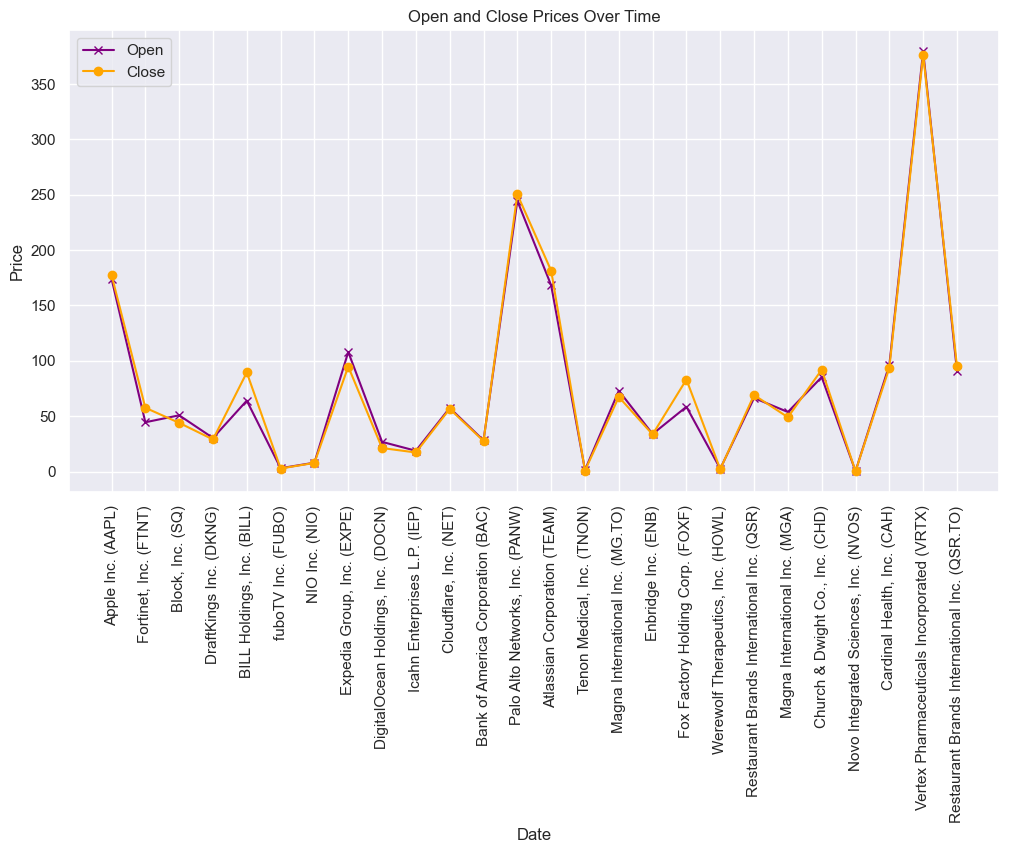

In [247]:

plt.figure(figsize=(12, 6))
plt.plot(df['Company_name'], df['open'], label='Open', marker='x', color = 'purple')
plt.plot(df['Company_name'], df['previous_close'], label='Close', marker='o', color= 'orange')
plt.title('Open and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90) 

plt.show()



`Observation`

* Several companies opened significantly lower than their previous day's closing prices, such as Fortinet, Inc. (FTNT) and BILL Holdings, Inc. (BILL).

* Some companies opened higher than their previous day's closing prices, signaling optimism, including Block, Inc. (SQ) and Expedia Group, Inc. (EXPE).

* A few companies had minor differences between their open and close prices, indicating relatively stable trading.

* These price disparities are influenced by market dynamics and company-specific factors.

